In [1]:
import numpy as np
import pandas as pd
import random
import os

# Цифровая симуляция партий для анализа компонентов настольной игры: кейс авторской игры по мотивам Jumanji 



Jumanji  - авторская настольная игра по мотивам известного фильма, разработанная и созданная для благотворительного проекта в подарок его участникам. Созданием концепции игры занимались организаторы проекта, не имеющие экспертных знаний в области дизайна настольных игр: при продумывании механик и игровых элементов авторы опирались на собственный игровой опыт и некий "здравый смысл". После определения правил игры и ее ключевых компонентов возникла необходимость протестировать или хотя бы проанализировать пилотную версию: играбельна ли она, нет ли дисбалансных элементов или доминирующей стратегии, не долго ли длится игровая сессия и т.д. В связи с ограниченностью всех ресурсов: время, люди, материалы для прототипа, возникла идея автоматической тестировки или цифровой симмуляции: "давайте напишем код, который проиграет в игру N раз, а мы посмотрим на статистику".

Гипотеза про то, что игру возможно протестировать без участия реальных игроков легла в основу данного проекта. Для достижения цели, а именно проверки этой гипотезы предстояло:
1. автоматизировать одну полную игровую сессию,
2. автоматизировать цикл игровых сессий с разными вводными параметрами (кол-во игроков, длина дорожек, колоды и т.д.)
3. определить показатели для анализа игры
4. посредством цифровых симмуляций игровых сессий собрать статистику по этим показателям
5. сделать содержательные выводы относительно самой игры и возможностей автоматического тестирования.

Работа над проектом включала в себя следующие этапы:
1. Создание основных объектов игры
2. Автоматизация главной механики движения (игра без карточек)
3. Добавление механики действия: взятие карточки и выполнения ее предписаний на примере 1-2 типов карточек
4. Автоматизация полной игровой сессии со всеми объектами и карточками
5. Доработка кода для сбора статистики
6. Анализ игры посредством цикла цифровых симмуляций

Далее рассмотрим каждый из них подробнее.

## Этап 0: Что нужно знать об игре

Правила игры следующие:
1. Игра предназначена для 2-4 игроков.
2. Компоненты игры: 1 игральный кубик, 50 карт (уникальных 34): 18 карт событий и 32 карты испытаний.
3. В игре два типа дорожек: дорожки №1 и №3 длиной 43 хода и дорожки №2 и №4 длиной 30 ходов.
4. Ход: игрок бросает кубик и продвигается на выпавшее число шагов вперед, а затем

    4.1 Если игрок продвинулся на 1-4 клетки - игрок тянет карту испытаний и выполняет ее.
    
    4.2 Если на 5-6 клеток - игрок тянет карту событий, которая действует на всех игроков и они выполняют ее вместе.

5. Побеждает тот, кто первым доходит до конца пути.

<img src="Джуманджи дорожки.png">

## Этап 1: Инициализируем основные игровые объекты

Основные игровые классы для первой иттеарции автоматизации (игры без карточек) включают в себя дорожку, по которой идет игрок, кубик, который определяет его продвижение, и, непосредственно, сам игрок или его "аватар"

In [2]:
#Дорожка
class Path():
     def __init__(self,num,length):
            self.num=num
            self.length=length

In [3]:
#Кубик (особенно пригодится, если в игре потребуется 2 кубика)
class Dice:
    def __init__(self,n_sides=6):
        self.n=n_sides
        self.top=random.randint(1, n_sides)
        
    def roll(self):
        self.top=random.randint(1, self.n)
        return self.top

In [4]:
#Игрок
class Player:
    def __init__(self,p_name, p_path):
        self.name=p_name
        self.path=p_path
    current_cell = 0
    moves = 0
    def move(self, steps):
        self.moves=self.moves+1
        if self.current_cell+steps>self.path.length:
            self.current_cell = self.path.length
        else:
            self.current_cell = self.current_cell+steps
    def nullify(self):
        self.current_cell = 0
        self.moves = 0
            

## Этап 3: Автоматизируем игру без карточек

Сначала сделаем основу игры - механики ее движения и победы: игроки ходят, кидая кубик, пока один из них не победит.
Уже здесь записываем базовую статистику партии: кто выиграл, сколько кругов понадобилось, не сколько для анализа, сколько для проверки самих себя.

In [5]:
#Инициализируем игру с 2 игроками
path_1 = Path(1,43)
path_3 = Path(2,43)

player_A = Player('A', path_1)
player_B = Player('B', path_3)
players_list = [player_A,player_B]

dice = Dice()

In [6]:
#Цикл одной игры
statistics=[]
cycles=0
winner = False
while winner==False:
    cycles=cycles+1
    for player in players_list:
        player.move(dice.roll())
        if player.current_cell==player.path.length:
            statistics.append([player.name,cycles])
            print("loop done")
            winner=True
            break
statistics

loop done


[['A', 11]]

In [7]:
#Цикл N партий
statistics=[]
N=10
n=0
while n<N:
    for player in players_list:
        player.nullify()
    n=n+1
    cycles=0
    winner = False
    while winner==False:
        cycles=cycles+1
        for player in players_list:
            player.move(dice.roll())
            if player.current_cell==player.path.length:
                statistics.append([n, player.name,cycles])
                print("loop done",n)
                winner=True
                break
statistics

loop done 1
loop done 2
loop done 3
loop done 4
loop done 5
loop done 6
loop done 7
loop done 8
loop done 9
loop done 10


[[1, 'B', 10],
 [2, 'A', 10],
 [3, 'A', 10],
 [4, 'B', 14],
 [5, 'A', 15],
 [6, 'B', 10],
 [7, 'B', 12],
 [8, 'B', 10],
 [9, 'B', 11],
 [10, 'A', 14]]

После первой иттерации автоматизации видим, что в среднем партия "пустой" игры занимает 12 кругов (игроки 12 раз кидают кубик и ходят). Учитывая равные условия (равную длинну дорожек) и непредвзятость теории вероятности (числа на кубике), удивляться тому, что у нас примерно равный винрейт обоих игроков, не приходится.

## Этап 4: Добавим в игру 1-2 типа карточек

Наращиваем на основу то, что игрок в зависимости от числа на кубике - берет карточку. Пока сократим выбор до 2 типов: карты событий, меняющие игроков местами, и карты испытаний с "дуэлью" игроков (игроку, которому выпала карта, необходимо выбрать другого игрока и посостязаться с ними, в зависимости от победы или поражения игроки совершают движение на доске). Помимо добавления классов самих карточек потребовалось также добавить совокупные механики: обмен позициями на игровом поле, выбор другого игрока и состязание с ним.

In [8]:
#Добавляем класс базовой карточки, карточки с дуэлью и колоды
class Card():
    def __init__(self,c_name,c_class, c_descr, c_type):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        
class Card_compete_move():
    def __init__(self,c_name,c_class, c_descr, c_type, c_winner, c_loser):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        self.winner=c_winner
        self.loser=c_loser    
        
class Deck():
    def __init__(self,the_cards):
        self.cards=the_cards.copy()
        self.all_cards=the_cards.copy()
        
    def shuffle(self):
        for i in range(len(self.cards)-1,0,-1):
            r=random.randint(0,i)
            self.cards[i],self.cards[r]=self.cards[r],self.cards[i]
            
    def get_card(self):
        return self.cards.pop()
    
    def renew_deck(self):
        self.cards=self.all_cards.copy()
        self.shuffle()


In [9]:
#Добавляем необходимые вспомогательные функции: обмен игровыми позициями, выбор игрока, определение победителя/проигравшего
def change_paths(players_list):
    positions=[]
    for player in players_list:
        positions.append([player.path,player.current_cell])
    positions.append(positions.pop(0))
    for i in range(len(players_list)):
        players_list[i].path=positions[i][0]
        players_list[i].current_cell=positions[i][1]
        
def choose_player(current_player,players):
    players=players.copy()
    players.remove(current_player)
    r=random.randint(0,len(players)-1)
    return players[r]
        
def competition(players_list):
    players=players_list.copy()
    for i in range(len(players)-1,0,-1):
            r=random.randint(0,i)
            players[i],players[r]=players[r],players[i]
    return players

In [10]:
#Опробуем на карточках события, которые меняют местами
df=pd.read_csv("change_path.csv", sep=";")
my_cards = [(Card(row.card_name,row.card_class, row.description,row.type)) for index, row in df.iterrows() ] 

deck_event=Deck(my_cards)
k=deck_event.get_card()
deck_event.renew_deck()
vars(k)

{'card_name': 'swirl',
 'card_class': 'event',
 'descr': 'Водоворот: игроки меняются позициями на игровом поле против часовой стрелки.',
 'type': 'change_path'}

In [11]:
#и на карточках испытаний, двигают игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
trial_cards = [(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ] 
deck_trial=Deck(trial_cards)
k=deck_trial.get_card()
deck_trial.renew_deck()
vars(k)

{'card_name': 'armrestling',
 'card_class': 'trial',
 'descr': 'Сила в руках: выбери игрока и сыграй с ним в Армрестлинг. Победитель остается на своем месте, а проигравший шагает на 2 клетки назад.',
 'type': 'compete_move',
 'winner': 0,
 'loser': -2}

In [12]:
#Инициализируем игру, на этот раз с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()

In [13]:
#Цикл одной игры
for player in players_list:
    player.nullify()

statistics=[]
card_history=[]
cycles=0
winner = False

while winner==False:
    cycles=cycles+1
    for player in players_list:
        current_dice_roll=dice.roll()
        player.move(current_dice_roll)
        if player.current_cell==player.path.length:
            statistics.append([player.name,cycles])
            print("game session done")
            winner=True
            break
        else:
            #Если берем карту испытания
            if current_dice_roll<5:
                if len(deck_trial.cards)==0:
                    deck_trial.renew_deck()
                    k=deck_trial.get_card()
                else:
                    k=deck_trial.get_card()
                    
                card_history.append([player.name,k.card_name,k.card_class])
                
                if k.type=='compete_move':
                    comp_res=competition([player,choose_player(player,players_list)])
                    comp_res[0].current_cell=comp_res[0].current_cell+k.winner
                    comp_res[-1].current_cell=comp_res[-1].current_cell+k.winner
                    print(player.name,'took trial')   
                else:
                    print(player.name,'took trial')
                    
            #Если берем карту события   
            else:
                if len(deck_event.cards)==0:
                    deck_event.renew_deck()
                    k=deck_event.get_card()
                else:
                    k=deck_event.get_card()
                    
                card_history.append([player.name,k.card_name,k.card_class]) 
                
                if k.type=='change_path':
                    print(player.name,'took event')
                    change_paths(players_list)    
                else:
                    print(player.name,'took event')
statistics

A took trial
B took trial
C took trial
A took event
B took trial
C took trial
A took event
B took event
C took event
A took event
B took event
C took event
A took trial
B took trial
C took event
A took event
B took trial
C took event
A took event
B took event
C took trial
A took event
game session done


[['B', 8]]

Цикл игры стал существенно сложнее, т.к. помимо непосредственного взятия карточки необходимо также выполнить ее предписание. Для исполнения условий карточки мы использовали примитивный rule-based алгоритм, определяющий тип карточки, запускающий вспомогательные функции и передвигающий игроков. Как мы видим, даже при добавлении 2 относительно простых типов карт, кол-во раундов сократилось до 8. Мы также видим, что карты испытаний выпадают чаще, на что и был расчет.

## Этап 5: Игра со всеми карточками

На данном этапе необходимо было добавить классы для всех остальных карт игры. Учитывая, что внутри самой игры они не поделены на группы, было принято решение разделить все карты на группы с характерными для них механиками (в миро сгруппировали похожие между собой карты с точки зрения их действия, а затем определили, какая вспомогательная механика стоит за каждой группой). Это позволило сократить кол-во объектов, однако, какие-то карты все равно требовали уникального подхода. Какие группы у нас вышли:
* Карточки опций - карточки как событий, так и испытаний - они имеют не менее двух исходов в зависимости от действий участников. Вероятность наступления исходов чаще всего различна и демонстрирует сложность задания на карточке. Например, Карточка "Тише едешь, дальше будешь":  В течение следующего хода тебе нельзя разговаривать и издавать звуки. Если хотя бы один звук сорвется с твоих уст – отступай на 2 клетки назад, если все прошло удачно: продвинься на 2 клетки вперед. Исход А - игрок провалил испытание и двигается назад (вероятность 0.6), исход Б - игрок выполнил испытание и двигается вперед (0.4).

* Карточки движения (только карточки событий) - эти карты заставляют всех игроков соревноваться между собой, по результатам этого соревнования игроки двигаются согласно карточке. Например,"Со скоростью света": игрок, получивший данную карту, громко зачитывает ее условия остальным игрокам. Как только игрок, получивший эту карту, произнесет слово Джуманджи, все должны накрыть ладонью центр поля, тот, кто сделает это последним – отступает на шаг назад. 

* Карточка риска - уникальный тип карт, для которого потребовался отдельный класс. Суть заключается в том, что игроку предоставляется возможность просто пропустить ход или рискнуть и либо откатиться назад, либо продвинуться вперед. Карточка схожа с карточкой опций, ее отличие лишь в том, что здесь 2 уровня опций: рисковать/не рисковать, риск оправдался/не оправдался. Например, "Риск дело благородное": Перед тобой бушующая река… и возможность срезать путь. Варианта два:
- Ничего не предпринимать и пропустить ход, дожидаясь пока ее уровень опустится и ты сможешь преодолеть ее. 
- Рискнуть и попробовать преодолеть ее сейчас. Бросай кубик, если выпало 1,2,3 – то тебе повезло и тебя не снесло течением, двигайся вперед на 3 клетки. Если выпало 4,5,6 – что ж, для настоящего исследователя 7 верст не крюк, отступи на 3 клетки назад. 

* Карточки стихийных бедствий - карточки, которые действют на каждого игрока по своему. Например, "Стихийное бедствие": Игрок А остается на своем месте, Игрок Б двигается на клетку назад, игрок В пропускает ход, если не выбросит 5 или 6, Игрок Г бросает кубик: если выпало четное – стоит на месте, если нечетное – приседает 15 раз, чтобы остаться на месте.

К этим карточкам потребовались вспомогательные механики: пропуск хода, определение исхода и т.д. Однако, было решено не прописывать отдельные функции, а расширить rule-based алгоритм соверешния действия с карточки и обернуть этот большой массив if else в одну функцию. Также для упрощения кода была добавлена команда, проверяющая на каждом ходе, не закончилась ли колода (если закончилась, перетасуй и обнови колоду).

In [14]:
#Добавляем упомянутые классы карточек
class Card_option():
    def __init__(self,c_name,c_class, c_descr, c_type, c_probs, c_A_who,c_A_action,c_B_who,c_B_action):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        self.probs=c_probs
        self.A_who=c_A_who
        self.A_action=c_A_action
        self.B_who=c_B_who
        self.B_action=c_B_action
        
class Card_event_move():
    def __init__(self,c_name,c_class, c_descr, c_type, c_who,c_what):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        self.who=c_who
        self.what=c_what
        
class Card_risk():
    def __init__(self,c_name,c_class, c_descr, c_type, c_probs_lv1,c_A_action, c_probs_lv2,c_B_action,c_C_action):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        self.probs_lv1=c_probs_lv1
        self.A_action=c_A_action
        self.probs_lv2=c_probs_lv2
        self.B_action=c_B_action
        self.C_action=c_C_action
        
class Card_disaster():
    def __init__(self,c_name,c_class, c_descr, c_type, c_player1, c_player2, c_player3, c_player4):
        self.card_name=c_name
        self.card_class=c_class
        self.descr=c_descr
        self.type=c_type
        self.player1=c_player1
        self.player2=c_player2
        self.player3=c_player3
        self.player4=c_player4
    def player_action(self,index):
        if index == 1:
            return self.player1
        elif index ==2:
            return self.player2
        elif index == 3:
            return self.player3
        else:
            return self.player4

In [15]:
#Добавляем функции
#проверка колоды и ее обновление 
def check_decks(decks):
    for deck in decks:
        if len(deck.cards)==0:
            deck.renew_deck()
            
#вторая фаза хода (выполнение действия на карточке)
def card_action(player,player_list,current_dice_roll,missing_move):
    if current_dice_roll<5:
        k=deck_trial.get_card()
        card_history.append([player.name,k.card_name,k.card_class])
        if k.type=='compete_move':
            comp_res=competition([player,choose_player(player,players_list)])
            comp_res[0].current_cell=comp_res[0].current_cell+k.winner
            comp_res[-1].current_cell=comp_res[-1].current_cell+k.winner
            print(player.name,'took trial_compete',player.current_cell,current_dice_roll)
            
        elif k.type=='risk':
            p=random.uniform(0, 1)
            if p<k.probs_lv1:
                missing_move.append(player)
                print(player.name," should miss move",player.current_cell,current_dice_roll)
            else:
                p=random.uniform(0, 1)
                if p<k.probs_lv2:
                    player.current_cell=player.current_cell+int(k.B_action)
                else:
                    player.current_cell=player.current_cell+int(k.C_action)
            print(player.name,'took event risk',player.current_cell)
            
        elif k.type=='option':
            p=random.uniform(0, 1)
            if p<k.probs:
                if k.A_who=='player':
                    player.move(int(k.A_action))
                else:
                    player.move(int(k.A_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.A_action.split(",")[1]))
                print(player.name,'took trial_optionA',player.current_cell,current_dice_roll)
            else:
                if k.B_who=='player':
                    if k.B_action =='miss_next_move':
                        missing_move.append(player)
                        print(player.name," should miss move",player.current_cell,current_dice_roll)
                    elif k.B_action =='make_move':
                        for pl in players_list:
                            pl.move(dice.roll())
                    else:
                        player.move(int(k.B_action))
                elif k.B_who=='any':
                    if k.B_action =='miss_next_move':
                        missing_move.append(player)
                        print(player.name," should miss move",player.current_cell,current_dice_roll)

                else:
                    player.move(int(k.B_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.B_action.split(",")[1]))
                print(player.name,'took trial_optionB',player.current_cell,current_dice_roll)
                
        else:
            print(player.name,'took trial',player.current_cell)
                    
    else:
        k=deck_event.get_card()
        card_history.append([player.name,k.card_name,k.card_class]) 
        if k.type=='change_path':
            print(player.name,'took event',player.current_cell)
            change_paths(players_list)
        elif k.type=='compete_move':
            s=players_list.copy()
            s.append(player)
            loser=choose_player(player,s)
            if k.who=='except_winner':
                s.remove(loser)
                for pl in s:
                    pl.current_cell=loser.current_cell+int(k.what)
            else:
                if k.what == 'make_move':
                    loser.move(dice.roll())
                else:
                    loser.current_cell=loser.current_cell+int(k.what)
            print(player.name,'took event',player.current_cell)

        elif k.type=='disaster':
            for i in range(len(players_list)):
                if k.player_action(i) == 'miss_move_option':
                    p=random.uniform(0, 1)
                    if p<0.67: 
                        missing_move.append(players_list[i])
                        print(players_list[i].name," should miss move",players_list[i].current_cell)
                else:
                    players_list[i].current_cell=  players_list[i].current_cell+int(k.player_action(i))
                    print(players_list[i].name,'took event',players_list[i].current_cell)
           
        elif k.type=='option':
            p=random.uniform(0, 1)
            if p<k.probs:
                if k.A_who=='last':
                    s=players_list.copy()
                    s.append(player)
                    loser=choose_player(player,s)
                    loser.move(int(k.A_action))
                elif k.A_who=='all':
                    pass
                else:
                    player.move(int(k.A_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.A_action.split(",")[1]))
                print(player.name,'took trial_optionA',player.current_cell,current_dice_roll)
            else:
                if k.B_who=='all':
                    if k.B_action =='make_move':
                        for pl in players_list:
                            pl.move(dice.roll())
                    else:
                        for pl in players_list:
                            pl.move(int(k.B_action))
                else:
                    s=players_list.copy()
                    s.append(player)
                    op=choose_player(player,s)
                    op.move(int(k.B_action))
                print(player.name,'took trial_optionB',player.current_cell,current_dice_roll)
        else:
            print(player.name,'took event')
    


Теперь настало время создать колоды. Для этого, как и раньше, для каждой категории карточек мы испортируем таблицу с характерными для нее заполненными полями. Например, так выглядит таблица с картами опций:

In [16]:
#Параметры карточек
df=pd.read_csv("option.csv", sep=";", usecols=[0,1,2,3,4,5,6,7,8])
df.head()

,card_name,card_class,description,type,probs,A_who,A_action,B_who,B_action
0,night,event,Ночь: все игроки должны молчать в течение 1 кр...,option,0.6,last,-1,all,1
1,triple hell,event,"Тройной атас: тройка – заколдованная цифра, лу...",option,0.8,last,-3,all,make_move
2,triple hell,event,"Тройной атас: тройка – заколдованная цифра, лу...",option,0.8,last,-3,all,make_move
3,mosquitoes,event,Малярийные комары: каждого игрока в левую руку...,option,0.9,"player,any","-1,-1",all,1
4,mosquitoes,event,Малярийные комары: каждого игрока в левую руку...,option,0.9,"player,any","-1,-1",all,1


In [17]:
#Cоздаем колоды карт событий и карт испытаний
#события меняющие местами
df=pd.read_csv("change_path.csv", sep=";")
event_cards = [(Card(row.card_name,row.card_class, row.description,row.type)) for index, row in df.iterrows()] 
#события с опциями
df=pd.read_csv("option.csv", sep=";")
event_cards.extend([(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'event'].iterrows() ])

#события движение
df=pd.read_csv("event_move.csv", sep=";")
event_cards.extend([(Card_event_move(row.card_name,row.card_class, row.description,row.type,row.who, row.what))
               for index, row in df.iterrows() ])

#события риск
df=pd.read_csv("risk.csv", sep=";")
event_cards.extend([(Card_risk(row.card_name,row.card_class, row.description,row.type,
                                     row.probs_lv1,row.A_action, row.probs_lv2,row.B_action,row.C_action))
               for index, row in df.iterrows()])
#события риск
df=pd.read_csv("disaster.csv", sep=";")
event_cards.extend([(Card_disaster(row.card_name,row.card_class, row.description,row.type,
                                     row.player1,row.player2,row.player3,row.player4))
               for index, row in df.iterrows()])

#испытания опции
df=pd.read_csv("option.csv", sep=";")
trial_cards = [(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'trial'].iterrows() ]

#испытания, двигающие игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
trial_cards.extend([(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ])

#Колоды
deck_trial=Deck(trial_cards)
deck_trial.shuffle()
k=deck_trial.get_card()
deck_trial.renew_deck()
print(vars(k))
print()

deck_event=Deck(event_cards)
deck_event.shuffle()
k=deck_event.get_card()
deck_event.renew_deck()
print(vars(k))

{'card_name': 'armrestling', 'card_class': 'trial', 'descr': 'Сила в руках: выбери игрока и сыграй с ним в Армрестлинг. Победитель остается на своем месте, а проигравший шагает на 2 клетки назад.', 'type': 'compete_move', 'winner': 0, 'loser': -2}

{'card_name': 'golden pot', 'card_class': 'event', 'descr': 'Горшочек с золотом: тот, кто выбросит больше всего очков, ходит вне своего своего хода.', 'type': 'compete_move', 'who': 'winner', 'what': 'make_move'}


In [18]:
#Инициализируем игру с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()

In [19]:
#Цикл одной игры
for player in players_list:
    player.nullify()

statistics=[]
card_history=[]
cycles=0
winner = False
missing_move=[]

while winner==False:
    cycles=cycles+1
    for player in players_list:
        if player in missing_move:
            print(player.name,"misses move",player.current_cell)
            missing_move.remove(player)
            continue
        check_decks([deck_trial,deck_event])
        current_dice_roll=dice.roll()
        player.move(current_dice_roll)
        if player.current_cell==player.path.length:
            statistics.append([player.name,cycles])
            print("game session done")
            winner=True
            break
        else:
            card_action(player,players_list, current_dice_roll,missing_move)
statistics

A took event 4
B  should miss move 0
C took event 1
B misses move 0
C took event
A took trial_compete 9 4
B took trial_compete 2 1
C took trial_optionA 15 6
A took trial_optionA 9 4
B took event 7
C took trial_compete 11 1
A took event 12
B took trial_optionA 18 4
C took trial_optionB 16 4
A took event 19
B took trial_optionA 25 5
C took trial_optionB 20 1
A took trial_optionA 22 2
B took trial_optionB 30 3
C  should miss move 22 3
C took trial_optionB 22 3
A  should miss move 24 2
A took trial_optionB 24 2
B took trial_optionA 31 2
C misses move 22
A misses move 24
B took trial_optionA 32 1
C took trial_compete 26 3
A  should miss move 26 1
A took trial_optionB 26 1
B took trial_optionB 38 1
C took event 35
A misses move 38
A took event 38
B took event 39
C  should miss move 28
C misses move 28
A took trial_optionB 40 3
B took trial_compete 42 3
game session done


[['C', 11]]

In [20]:
card_history

[['A', 'disaster3', 'event'],
 ['C', 'risk', 'trial'],
 ['A', 'trap names', 'trial'],
 ['B', 'trap names', 'trial'],
 ['C', 'triple hell', 'event'],
 ['A', 'tonguetwister1', 'trial'],
 ['B', 'swirl', 'event'],
 ['C', 'duel dices', 'trial'],
 ['A', 'light speed', 'event'],
 ['B', 'letters', 'trial'],
 ['C', 'luck', 'trial'],
 ['A', 'golden pot', 'event'],
 ['B', 'night', 'event'],
 ['C', 'quiet', 'trial'],
 ['A', 'trap words', 'trial'],
 ['B', 'horserace', 'trial'],
 ['C', 'monkey curse', 'trial'],
 ['A', 'maleficent', 'trial'],
 ['B', 'tonguetwister2', 'trial'],
 ['B', 'snake', 'trial'],
 ['C', 'trap question', 'trial'],
 ['A', 'maleficent', 'trial'],
 ['B', 'luck', 'trial'],
 ['C', 'tornado', 'event'],
 ['B', 'disaster2', 'event'],
 ['A', 'trap eye', 'trial'],
 ['B', 'armrestling', 'trial']]

Как мы видим кол-во кругов с добавлением всего арсенала карточек снова увеличилось. Более того, вывод информации по каждому ходу был немного усложнен для самопроверки: мы удостоверялись, что игрок пропускает ход, что его движение происходит согласно вытянутой карте, а также отслеживали, какие именно карты принимали участие в партии. Однако, прежде. чем мы перейдем к сбору статистики и анализу, сначала немного изменим код.

## Этап 6: Шлифуем код для сбора статистики

Немного поправим функцию второй фазы хода: вместо вывода в "консоль" будем записывать всю необходимую информацию: игрока, кол-во его ходов, текущую позицию (после действия карты), имя вытянутой карты и ее тип (испытание или событие).

In [21]:
#вторая фаза хода (выполнение действия на карточке), в.т.ч. действие с картой опции
def card_action(player,player_list,current_dice_roll,missing_move):
    if current_dice_roll<5:
        k=deck_trial.get_card()
        if k.type=='compete_move':
            comp_res=competition([player,choose_player(player,players_list)])
            comp_res[0].current_cell=comp_res[0].current_cell+k.winner
            comp_res[-1].current_cell=comp_res[-1].current_cell+k.winner
            return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
            
        elif k.type=='risk':
            p=random.uniform(0, 1)
            if p<k.probs_lv1:
                missing_move.append(player)
            else:
                p=random.uniform(0, 1)
                if p<k.probs_lv2:
                    player.current_cell=player.current_cell+int(k.B_action)
                else:
                    player.current_cell=player.current_cell+int(k.C_action)
            return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
            
        elif k.type=='option':
            p=random.uniform(0, 1)
            if p<k.probs:
                if k.A_who=='player':
                    player.move(int(k.A_action))
                else:
                    player.move(int(k.A_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.A_action.split(",")[1]))
                return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
            else:
                if k.B_who=='player':
                    if k.B_action =='miss_next_move':
                        missing_move.append(player)
                    elif k.B_action =='make_move':
                        for pl in players_list:
                            pl.move(dice.roll())
                    else:
                        player.move(int(k.B_action))
                elif k.B_who=='any':
                    if k.B_action =='miss_next_move':
                        missing_move.append(player)
                else:
                    player.move(int(k.B_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.B_action.split(",")[1]))
                return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
                
        else:
            print(player.name,'took trial',player.current_cell)
                    
    else:
        k=deck_event.get_card()
        card_history.append([player.name,k.card_name,k.card_class]) 
        if k.type=='change_path':
            change_paths(players_list)
            return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
        elif k.type=='compete_move':
            s=players_list.copy()
            s.append(player)
            loser=choose_player(player,s)
            if k.who=='except_winner':
                s.remove(loser)
                for pl in s:
                    pl.current_cell=loser.current_cell+int(k.what)
            else:
                if k.what == 'make_move':
                    loser.move(dice.roll())
                else:
                    loser.current_cell=loser.current_cell+int(k.what)
            return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]

        elif k.type=='disaster':
            for i in range(len(players_list)):
                if k.player_action(i) == 'miss_move_option':
                    p=random.uniform(0, 1)
                    if p<0.67: 
                        missing_move.append(players_list[i])
                else:
                    players_list[i].current_cell=  players_list[i].current_cell+int(k.player_action(i))
                    return [players_list[i].name, players_list[i].moves,players_list[i].current_cell,k.card_name,k.card_class]
           
        elif k.type=='option':
            p=random.uniform(0, 1)
            if p<k.probs:
                if k.A_who=='last':
                    s=players_list.copy()
                    s.append(player)
                    loser=choose_player(player,s)
                    loser.move(int(k.A_action))
                elif k.A_who=='all':
                    pass
                else:
                    player.move(int(k.A_action.split(",")[0]))
                    op=choose_player(player,players_list)
                    op.move(int(k.A_action.split(",")[1]))
                return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
            else:
                if k.B_who=='all':
                    if k.B_action =='make_move':
                        for pl in players_list:
                            pl.move(dice.roll())
                    else:
                        for pl in players_list:
                            pl.move(int(k.B_action))
                else:
                    s=players_list.copy()
                    s.append(player)
                    op=choose_player(player,s)
                    op.move(int(k.B_action))
                return [player.name, player.moves,player.current_cell,k.card_name,k.card_class]
        else:
            print(player.name,'took event',k.type, k.card_name)
    


## Этап 7: Анализируем

Наконец, выбираем входные параметры для оценки: состав колоды, кол-во игроков, уготованные им дорожки и пробуем посмотреть на самый главный показатель - win rate: одинаково ли часто выигрывает каждый из игроков. 

In [22]:
#Cоздаем колоды карт событий и карт испытаний
#события меняющие местами
df=pd.read_csv("change_path.csv", sep=";")
event_cards = [(Card(row.card_name,row.card_class, row.description,row.type)) for index, row in df.iterrows()] 
#события с опциями
df=pd.read_csv("option.csv", sep=";")
event_cards.extend([(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'event'].iterrows() ])

#события движение
df=pd.read_csv("event_move.csv", sep=";")
event_cards.extend([(Card_event_move(row.card_name,row.card_class, row.description,row.type,row.who, row.what))
               for index, row in df.iterrows() ])


#события риск
df=pd.read_csv("disaster.csv", sep=";")
event_cards.extend([(Card_disaster(row.card_name,row.card_class, row.description,row.type,
                                     row.player1,row.player2,row.player3,row.player4))
               for index, row in df.iterrows()])

#испытания опции
df=pd.read_csv("option.csv", sep=";")
trial_cards = [(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'trial'].iterrows() ]

#испытания риск
df=pd.read_csv("risk.csv", sep=";")
trial_cards.extend([(Card_risk(row.card_name,row.card_class, row.description,row.type,
                                     row.probs_lv1,row.A_action, row.probs_lv2,row.B_action,row.C_action))
               for index, row in df.iterrows()])

#испытания, двигающие игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
trial_cards.extend([(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ])

#Колоды
deck_trial=Deck(trial_cards)
deck_trial.shuffle()
k=deck_trial.get_card()
deck_trial.renew_deck()
print(vars(k))
print()

deck_event=Deck(event_cards)
deck_event.shuffle()
k=deck_event.get_card()
deck_event.renew_deck()
print(vars(k))

{'card_name': 'trap names', 'card_class': 'trial', 'descr': 'Ловушка: объявите другим игрока, что вам выпала карта ловушки, но не показывайте ее содержание.\n«Никаких имен»: Заставьте кого-то обратиться к вам по имени. Тот, кто сделает это, ходит на 1 клетку назад, а вы двигаетесь на 1 вперед.', 'type': 'compete_move', 'winner': 1, 'loser': -1}

{'card_name': 'swirl', 'card_class': 'event', 'descr': 'Водоворот: игроки меняются позициями на игровом поле против часовой стрелки.', 'type': 'change_path'}


In [23]:
#Инициализируем игру с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()


In [24]:
#Цикл для 1000 партий
wins=pd.DataFrame(columns=['game_session', 'player', 'cycles'])
history_df = pd.DataFrame(columns=['game_session', 'player', 'move','position','card_name','card_type'])
game=1
G=1000
while game <G+1:
    for player in players_list:
        player.nullify()
    cycles=0
    winner = False
    missing_move=[]
    while winner==False:
        cycles=cycles+1
        for player in players_list:
            if player in missing_move:
                player.move(0)
                h=[player.name, player.moves,player.current_cell,'missed_move','missed_move']
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
                missing_move.remove(player)
                continue
            check_decks([deck_trial,deck_event])
            current_dice_roll=dice.roll()
            player.move(current_dice_roll)
            if player.current_cell==player.path.length:
                wins=wins.append(pd.Series([game,player.name,cycles],index = wins.columns),ignore_index=True)
                #print("game session done")
                winner=True
                break
            else:
                h=card_action(player,players_list, current_dice_roll,missing_move)
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
    game=game+1

In [25]:
wins

,game_session,player,cycles
0,1,B,11
1,2,B,5
2,3,C,6
3,4,A,10
4,5,A,8
...,...,...,...
995,996,C,7
996,997,A,8
997,998,A,7
998,999,C,5


In [26]:
history_df

,game_session,player,move,position,card_name,card_type
0,1,A,2,3,horserace,trial
1,1,B,2,5,horserace,trial
2,1,C,2,2,trap words,trial
3,1,A,4,5,balance,trial
4,1,B,4,8,duel hand,trial
...,...,...,...,...,...,...
23065,1,B,12,16,letters,trial
23066,1,C,15,23,tonguetwister1,trial
23067,1,A,13,37,triple hell,event
23068,1,B,14,15,monkey curse,trial


In [27]:
print("A win rate:", len(wins[(wins['player']=="A")])/G)
print("B win rate:", len(wins[(wins['player']=="B")])/G)
print("C win rate:", len(wins[(wins['player']=="C")])/G)

A win rate: 0.341
B win rate: 0.304
C win rate: 0.355


Первое, что мы видим, что win rates распределены довольно равномерно, несмотря на разницу в длине пути! Скорее всего, карточки "торнадо" и "водоворот" - невилируют эту разницу и способствуют балансу.

Чтобы проверить это, уберем их из колоды и посмотрим, как меняются покзатели:

In [28]:
#Cоздаем колоды карт событий и карт испытаний
#события с опциями
df=pd.read_csv("option.csv", sep=";")
event_cards =[(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'event'].iterrows() ]

#события движение
df=pd.read_csv("event_move.csv", sep=";")
event_cards.extend([(Card_event_move(row.card_name,row.card_class, row.description,row.type,row.who, row.what))
               for index, row in df.iterrows() ])


#события риск
df=pd.read_csv("disaster.csv", sep=";")
event_cards.extend([(Card_disaster(row.card_name,row.card_class, row.description,row.type,
                                     row.player1,row.player2,row.player3,row.player4))
               for index, row in df.iterrows()])

#испытания опции
df=pd.read_csv("option.csv", sep=";")
trial_cards = [(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'trial'].iterrows() ]

#испытания риск
df=pd.read_csv("risk.csv", sep=";")
trial_cards.extend([(Card_risk(row.card_name,row.card_class, row.description,row.type,
                                     row.probs_lv1,row.A_action, row.probs_lv2,row.B_action,row.C_action))
               for index, row in df.iterrows()])

#испытания, двигающие игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
trial_cards.extend([(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ])

#Колоды
deck_trial=Deck(trial_cards)
deck_trial.shuffle()
k=deck_trial.get_card()
deck_trial.renew_deck()


deck_event=Deck(event_cards)
deck_event.shuffle()
k=deck_event.get_card()
deck_event.renew_deck()


#Инициализируем игру с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()

#Цикл для 1000 партий
wins=pd.DataFrame(columns=['game_session', 'player', 'cycles'])
history_df = pd.DataFrame(columns=['game_session', 'player', 'move','position','card_name','card_type'])
game=1
G=1000
while game <G+1:
    for player in players_list:
        player.nullify()
    cycles=0
    winner = False
    missing_move=[]
    while winner==False:
        cycles=cycles+1
        for player in players_list:
            if player in missing_move:
                player.move(0)
                h=[player.name, player.moves,player.current_cell,'missed_move','missed_move']
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
                missing_move.remove(player)
                continue
            check_decks([deck_trial,deck_event])
            current_dice_roll=dice.roll()
            player.move(current_dice_roll)
            if player.current_cell==player.path.length:
                wins=wins.append(pd.Series([game,player.name,cycles],index = wins.columns),ignore_index=True)
                #print("game session done")
                winner=True
                break
            else:
                h=card_action(player,players_list, current_dice_roll,missing_move)
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
    game=game+1

In [29]:
print("A win rate:", len(wins[(wins['player']=="A")])/G)
print("B win rate:", len(wins[(wins['player']=="B")])/G)
print("C win rate:", len(wins[(wins['player']=="C")])/G)

A win rate: 0.095
B win rate: 0.846
C win rate: 0.059


Действительно, если бы карточек смены пути не существовало - ад бы творился во плоти: игрок B доходил бы быстрее каждый раз, почти не оставляя возможности игрокам A и С выиграть.

Вернемся к нормальной колоде со всеми картами и попробуем теперь посмотреть КД каждой карты: для каждой карты посчитаем отношение побед с этой картой к отношению партий, в которых карта участвовала. Учитывая, что после прогона 3 подходов по 1000 партий, ситуация была каждый раз разная, было принято решение увеличить кол-во партий до 2 000.

In [61]:
#Cоздаем колоды карт событий и карт испытаний
#события меняющие местами
df=pd.read_csv("change_path.csv", sep=";")
event_cards = [(Card(row.card_name,row.card_class, row.description,row.type)) for index, row in df.iterrows()] 
#события с опциями
df=pd.read_csv("option.csv", sep=";")
event_cards.extend([(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'event'].iterrows() ])

#события движение
df=pd.read_csv("event_move.csv", sep=";")
event_cards.extend([(Card_event_move(row.card_name,row.card_class, row.description,row.type,row.who, row.what))
               for index, row in df.iterrows() ])


#события риск
df=pd.read_csv("disaster.csv", sep=";")
event_cards.extend([(Card_disaster(row.card_name,row.card_class, row.description,row.type,
                                     row.player1,row.player2,row.player3,row.player4))
               for index, row in df.iterrows()])

#испытания опции
df=pd.read_csv("option.csv", sep=";")
trial_cards = [(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'trial'].iterrows() ]

#испытания риск
df=pd.read_csv("risk.csv", sep=";")
trial_cards.extend([(Card_risk(row.card_name,row.card_class, row.description,row.type,
                                     row.probs_lv1,row.A_action, row.probs_lv2,row.B_action,row.C_action))
               for index, row in df.iterrows()])

#испытания, двигающие игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
trial_cards.extend([(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ])

#Колоды
deck_trial=Deck(trial_cards)
deck_trial.shuffle()
k=deck_trial.get_card()
deck_trial.renew_deck()


deck_event=Deck(event_cards)
deck_event.shuffle()
k=deck_event.get_card()
deck_event.renew_deck()


#Инициализируем игру с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()

#Цикл для 2000 партий
wins=pd.DataFrame(columns=['game_session', 'winner', 'cycles'])
history_df = pd.DataFrame(columns=['game_session', 'player', 'move','position','card_name','card_type'])
game=1
G=2000
while game <G+1:
    for player in players_list:
        player.nullify()
    cycles=0
    winner = False
    missing_move=[]
    while winner==False:
        cycles=cycles+1
        for player in players_list:
            if player in missing_move:
                player.move(0)
                h=[player.name, player.moves,player.current_cell,'missed_move','missed_move']
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
                missing_move.remove(player)
                continue
            check_decks([deck_trial,deck_event])
            current_dice_roll=dice.roll()
            player.move(current_dice_roll)
            if player.current_cell==player.path.length:
                wins=wins.append(pd.Series([game,player.name,cycles],index = wins.columns),ignore_index=True)
                #print("game session done")
                winner=True
                break
            else:
                h=card_action(player,players_list, current_dice_roll,missing_move)
                game_step = pd.Series([game]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
    game=game+1

Партии "отыграли", теперь посчитаем КД для карточек: кол-во партий, в которых у выигравшего игрока была эта карта, разделим на кол-во партий, в который эта карта в целом появлялась.

In [62]:
history_df = pd.merge(history_df,  
                     wins,  
                     on ='game_session',  
                     how ='left') 
history_df

,game_session,player,move,position,card_name,card_type,winner,cycles
0,1,A,1,0,tornado,event,B,8
1,1,B,2,0,trap eye,trial,B,8
2,1,A,1,0,disaster2,event,B,8
3,1,A,2,2,monkey curse,trial,B,8
4,1,B,4,11,triple hell,event,B,8
...,...,...,...,...,...,...,...,...
46261,2000,B,9,21,armrestling,trial,A,7
46262,2000,C,10,28,triple hell,event,A,7
46263,2000,A,8,40,golden pot,event,A,7
46264,2000,B,11,21,trap names,trial,A,7


In [63]:
all_cards=[]
for card in trial_cards:
    all_cards.append(card.card_name)
for card in event_cards:
    all_cards.append(card.card_name)
all_cards=list(set(all_cards))

In [64]:
total_sessions=[]
won_sessions=[]
card_type=[]
for card in all_cards:
    total_sessions.append(len(set(history_df[history_df.card_name==card].game_session)))
    won_sessions.append(len(set(history_df[(history_df.player==history_df.winner) & (history_df.card_name==card)].game_session)))
    card_type.append(set(history_df[history_df.card_name==card].card_type))

card_stats=pd.DataFrame(all_cards,columns=['card'])
card_stats['card_type']=card_type
card_stats['total_use']=total_sessions
card_stats['won']=won_sessions
card_stats['win_rate']=card_stats.won/card_stats.total_use


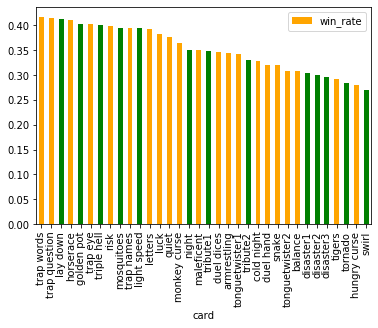

In [65]:
card_stats=card_stats.sort_values(by='win_rate',ascending=False)    
colors=[]
for row in card_stats.card_type:
    if row=={'trial'}:
        colors.append('orange')
    else:
        colors.append('green')
import matplotlib.pyplot as plt

card_stats.plot.bar(x='card', y='win_rate', rot=90,color=colors)


На графике представлены карты в соответствии со своим уровнем "полезности" (для удобства он также отражен в таблице ниже): оранжевым подсвечены карты испытаний, зеленым карты событий. 

Интересно, но увеличение кол-ва партий с 1000 до 2000 не помогло справиться с проблемой разных результатов. При предыдущем прогоне для 2000 партий топ 3 лидера были: horserace (сейчас 4 место), trap words (1 место), lay down (3 место). Тем не менее при всех сделанных прогонах (3 по 1000 партий и 2 по 2000 партий) ситуация с распределением win rates оставалась примерно одинаковой: win rate распределен среди карточек относительно равномерно в пределах от 0.30 до 0.43
В последнем прогоне, также есть небольшой намек на биполярность распределения: после карточки monckey curse происходит более существенное падение, что делит карточки на две группы (с winrate >0.36 и c winrate < 0.36). Рассмотрим эти группы:
1. В первой группе находится 15 карточек: 5 карт событий и 10 карт испытаний. Однако карты как событий, так и испытаний в этой группе обладают свойством, которое никак не отражается в таблице и графике: всех карт этой группы в колоде по 2 штуки. Таким образом, вероятность попасться любому игроку (в т.ч. победителю) у них просто выше.  
2. Во второй группе находится 19 карточек: 8 карт событий и 11 карт испытаний, только 1 карта (maleficent) встречается в колоде дважды. 
Мы осознано использовали всю колоду, т.к. формирование оптимального состава колод также одна из задач тестирования. По полученным результатам мы видим, что кол-во играет существенную роль, т.к. в обоих колодах происходит разбиение на более сильных и более слабых.

In [66]:
card_stats.sort_values(by='win_rate',ascending=False)        

,card,card_type,total_use,won,win_rate
33,trap words,{trial},1329,554,0.416855
4,trap question,{trial},1321,547,0.414080
12,lay down,{event},1185,490,0.413502
13,horserace,{trial},1319,543,0.411676
10,golden pot,{event},1235,498,0.403239
6,trap eye,{trial},1315,529,0.402281
8,triple hell,{event},1194,479,0.401173
3,risk,{trial},1282,511,0.398596
9,mosquitoes,{event},1193,472,0.395641
32,trap names,{trial},1331,526,0.395192


Соответственно, для более "чистой" картины непосресдвтенно для элементов необходимо прогнать те же 2000 партий для колод без дубликатов. Поехали:

In [70]:
#Cоздаем колоды карт событий и карт испытаний
#события меняющие местами
df=pd.read_csv("change_path.csv", sep=";")
df=df.drop_duplicates()
event_cards = [(Card(row.card_name,row.card_class, row.description,row.type)) for index, row in df.iterrows()] 

#события с опциями
df=pd.read_csv("option.csv", sep=";")
df=df.drop_duplicates()
event_cards.extend([(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'event'].iterrows() ])

#события движение
df=pd.read_csv("event_move.csv", sep=";")
df=df.drop_duplicates()
event_cards.extend([(Card_event_move(row.card_name,row.card_class, row.description,row.type,row.who, row.what))
               for index, row in df.iterrows() ])


#события риск
df=pd.read_csv("disaster.csv", sep=";")
df=df.drop_duplicates()
event_cards.extend([(Card_disaster(row.card_name,row.card_class, row.description,row.type,
                                     row.player1,row.player2,row.player3,row.player4))
               for index, row in df.iterrows()])

#испытания опции
df=pd.read_csv("option.csv", sep=";")
df=df.drop_duplicates()
trial_cards = [(Card_option(row.card_name,row.card_class, row.description,row.type,row.probs,
                                  row.A_who,row.A_action,row.B_who,row.B_action))
               for index, row in df[df.card_class == 'trial'].iterrows() ]

#испытания риск
df=pd.read_csv("risk.csv", sep=";")
df=df.drop_duplicates()
trial_cards.extend([(Card_risk(row.card_name,row.card_class, row.description,row.type,
                                     row.probs_lv1,row.A_action, row.probs_lv2,row.B_action,row.C_action))
               for index, row in df.iterrows()])

#испытания, двигающие игроков
df=pd.read_csv("simple_move_compete.csv", sep=";")
df=df.drop_duplicates()
trial_cards.extend([(Card_compete_move(row.card_name,row.card_class, row.description,row.type,row.winner,row.loser))
               for index, row in df.iterrows() ])

In [71]:
#Теперь соберем все это в колоды
deck_trial=Deck(trial_cards)
deck_trial.shuffle()
k=deck_trial.get_card()
deck_trial.renew_deck()


deck_event=Deck(event_cards)
deck_event.shuffle()
k=deck_event.get_card()
deck_event.renew_deck()

#Инициализируем игру с 3 игроками
path_1 = Path(1,43)
path_2 = Path(2,30)
path_3 = Path(3,43)

player_A = Player('A', path_1)
player_B = Player('B', path_2)
player_C = Player('C', path_3)
players_list = [player_A,player_B,player_C]

dice = Dice()

In [72]:
#Цикл для 2000 партий
wins=pd.DataFrame(columns=['game_session', 'winner', 'cycles'])
history_df = pd.DataFrame(columns=['game_session', 'player', 'move','position','card_name','card_type'])
game=1
G=2000
while game <G+1:
    for player in players_list:
        player.nullify()
    cycles=0
    winner = False
    missing_move=[]
    while winner==False:
        cycles=cycles+1
        for player in players_list:
            if player in missing_move:
                player.move(0)
                h=[player.name, player.moves,player.current_cell,'missed_move','missed_move']
                game_step = pd.Series([1]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
                missing_move.remove(player)
                continue
            check_decks([deck_trial,deck_event])
            current_dice_roll=dice.roll()
            player.move(current_dice_roll)
            if player.current_cell==player.path.length:
                wins=wins.append(pd.Series([game,player.name,cycles],index = wins.columns),ignore_index=True)
                #print("game session done")
                winner=True
                break
            else:
                h=card_action(player,players_list, current_dice_roll,missing_move)
                game_step = pd.Series([game]+h, index = history_df.columns)
                history_df = history_df.append(game_step, ignore_index=True)
    game=game+1

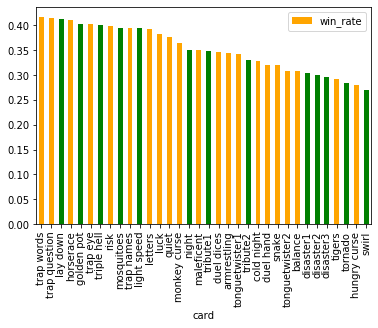

In [73]:
card_stats=card_stats.sort_values(by='win_rate',ascending=False)  
colors=[]
for row in card_stats.card_type:
    if row=={'trial'}:
        colors.append('orange')
    else:
        colors.append('green')
import matplotlib.pyplot as plt
card_stats.plot.bar(x='card', y='win_rate', rot=90,color=colors)


Интересно, что распредедение win rate осталось в том же диапазоне, но обозначилась более сильная биполярность: снова все, что до monkey curse  и включая ее саму (15 карт) обладает чуть более сильной полезностью. 
Внутри этой "сильной группы" присутствуют 5 карт событий: их сила может быть обусловлена рядом причин:
1. карта события выпадает когда игрока двигается на 5-6 клеток (что уже существенно для победы)
2. помимо большого прыжка, карта позволяет избежать испытания непосредственно для себя - под удар может попасть любой игрок.
Это все приводит к идее пересмотреть политику выдавать карты событий при 5-6, т.к. сам  ход является "наградой", за которой следует еще и возможность избежать "дебаффа". Выдачу при 3-4 можно будет легко протестировать.
Рассматриваем эту группу дальше: первые две карты - карты ловушек, они неминуемо продвигают игрока, взявшего их вперед и еще двигают рандомного игрока назад (увеличивая разрыв между ними от 2 до 4 клеток). Возможно, имеет смысл давать только бафф, без дебаффа. Однако, так уже делает horserace (которая находится на 4 месте).

Помимо этого можно заметить, что карты "одной группы", например, карты стихийных бедствий примерно одинаковы с точки зрения показателя: хорошо это или плохо решать уже геймдизайнеру, но на данный момент выглядит логично, что карты с одной механикой не приносят проблем с точки зрения баланса.

In [74]:
card_stats.sort_values(by='win_rate',ascending=False)        

,card,card_type,total_use,won,win_rate
33,trap words,{trial},1329,554,0.416855
4,trap question,{trial},1321,547,0.414080
12,lay down,{event},1185,490,0.413502
13,horserace,{trial},1319,543,0.411676
10,golden pot,{event},1235,498,0.403239
6,trap eye,{trial},1315,529,0.402281
8,triple hell,{event},1194,479,0.401173
3,risk,{trial},1282,511,0.398596
9,mosquitoes,{event},1193,472,0.395641
32,trap names,{trial},1331,526,0.395192


## Выводы

Главный вывод: игровую сессию можно автоматизировать и анализ N-го количества таких цифровых сиимуляций позволяет сделать содержательные выводы относительно игровых механик и элементов, навести геймдизайнера на идеи усовершенствования игры. Среди доступных нам методов анализа игры: 
* оценить, как наличие или отсутствие тех или иных элементов сказывается на игровых показателях (в частности win rate игроков, однако может использовать любой другой)
* оценить, как изменения в параметрах игры скажется на показателе
* рассмотреть разное начальное состояние игры (сколько игроков, на каких дорожках они стоят и т.д.) и какие результаты выдает оно
* за 3 минуты получить статистику по 1000 партий и рассмотреть среднее влияние каждого элемента на игру

Тем не менее, данный инструмент можно совершенствовать и дальше, к примеру, в следующих направлениях:
1. Комбинация и перебор: внедрение простого перебора, а тем более эволюционного алгоритма позволило бы не только смотреть, как меняется ситуация в зависимости от набора элементов, но автоматически подобрать оптимальную комбинацию/набор/игровые параметры: длина дорожек, состав колоды и т.д.
2. Добавление других методов оценки игры: на что кроме винрейта мы могли бы посмотреть?
3. Приведение кода в более пользовательско-ориентированный формат, в котором пользователь задает лишь изначальне параметры (карточки, длина пути, когда что выпадает), а система делает все остальное.
4. Масштабирование этого "прототипа": мы попробовали автоматизировать одну конкретную игру, но механики, задействованные в ней присутсвуют и в других играх.
5. Дополнительный функционал: исходя из необходимостей геймдизайнеров, данный инструмент мог бы выполнять и другие вспомогательные функции. Например, мы никак не анализировали текстовое описание карточек, а могли бы.

Именно эти направления и планируется реализовывать в дипломе.